In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [16]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
import requests

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.  
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(city_weather)

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | evensk
{'coord': {'lon': 159.23, 'lat': 61.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.99, 'feels_like': 19.8, 'temp_min': 28.99, 'temp_max': 28.99, 'pressure': 1025, 'humidity': 82, 'sea_level': 1025, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 23}, 'clouds': {'all': 0}, 'dt': 1603857507, 'sys': {'country': 'RU', 'sunrise': 1603831352, 'sunset': 1603863060}, 'timezone': 39600, 'id': 2125693, 'name': 'Evensk', 'cod': 200}
Processing Record 2 of Set 1 | pisco
{'coord': {'lon': -76.22, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.78, 'feels_like': 60.51, 'temp_min': 62.6, 'temp_max': 63, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 190}, 'clouds': {

{'coord': {'lon': 48.53, 'lat': 5.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.97, 'feels_like': 84.69, 'temp_min': 79.97, 'temp_max': 79.97, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 95}, 'clouds': {'all': 4}, 'dt': 1603857127, 'sys': {'country': 'SO', 'sunrise': 1603852270, 'sunset': 1603895276}, 'timezone': 10800, 'id': 57000, 'name': 'Hobyo', 'cod': 200}
Processing Record 18 of Set 1 | mar del plata
{'coord': {'lon': -57.56, 'lat': -38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.8, 'feels_like': 51.69, 'temp_min': 50, 'temp_max': 57, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1603857066, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 160387481

{'coord': {'lon': 153.1, 'lat': -26.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 78.53, 'temp_min': 72, 'temp_max': 75.99, 'pressure': 1007, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 23, 'gust': 11.01}, 'rain': {'1h': 0.24}, 'clouds': {'all': 54}, 'dt': 1603857095, 'sys': {'type': 3, 'id': 19651, 'country': 'AU', 'sunrise': 1603825242, 'sunset': 1603872112}, 'timezone': 36000, 'id': 2170581, 'name': 'Coolum Beach', 'cod': 200}
Processing Record 35 of Set 1 | lufilufi
{'coord': {'lon': -171.6, 'lat': -13.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.09, 'feels_like': 88.7, 'temp_min': 84, 'temp_max': 84.2, 'pressure': 1007, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1603857514, 'sys': {'type': 1, 'id': 7315, 

{'coord': {'lon': -76.51, 'lat': -8.18}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.92, 'feels_like': 77.79, 'temp_min': 71.92, 'temp_max': 71.92, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 959}, 'visibility': 6026, 'wind': {'speed': 1.81, 'deg': 292}, 'rain': {'1h': 2.85}, 'clouds': {'all': 100}, 'dt': 1603857516, 'sys': {'country': 'PE', 'sunrise': 1603795122, 'sunset': 1603839648}, 'timezone': -18000, 'id': 3691324, 'name': 'Tocache', 'cod': 200}
Processing Record 50 of Set 1 | leirvik
{'coord': {'lon': 5.5, 'lat': 59.78}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 47.91, 'feels_like': 43.83, 'temp_min': 46.99, 'temp_max': 48.99, 'pressure': 979, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 302, 'gust': 7}, 'rain': {'1h': 3.07}, 'clouds': {'all': 88}, 'dt': 1603857517, 

{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.79, 'feels_like': 2.7, 'temp_min': 11.79, 'temp_max': 11.79, 'pressure': 1026, 'humidity': 97, 'sea_level': 1026, 'grnd_level': 1020}, 'visibility': 624, 'wind': {'speed': 5.99, 'deg': 263}, 'clouds': {'all': 100}, 'dt': 1603857036, 'sys': {'country': 'RU', 'sunrise': 1603837493, 'sunset': 1603862347}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
Processing Record 17 of Set 2 | adrar
{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.53, 'feels_like': 69.93, 'temp_min': 78.53, 'temp_max': 78.53, 'pressure': 1013, 'humidity': 21, 'sea_level': 1013, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 9.84, 'deg': 22}, 'clouds': {'all': 0}, 'dt': 1603856940, 'sys': {'country'

{'coord': {'lon': -81.4, 'lat': 30.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.74, 'feels_like': 81.32, 'temp_min': 77, 'temp_max': 78.8, 'pressure': 1020, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1603857523, 'sys': {'type': 1, 'id': 5111, 'country': 'US', 'sunrise': 1603798584, 'sunset': 1603838533}, 'timezone': -14400, 'id': 4146354, 'name': 'Atlantic Beach', 'cod': 200}
Processing Record 35 of Set 2 | san isidro
{'coord': {'lon': -77.05, 'lat': -12.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 62.26, 'feels_like': 57.36, 'temp_min': 62.01, 'temp_max': 62.6, 'pressure': 1016, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1603857524, 'sys': {'type': 1, 'id': 8682, 'country': 'PE', 'sunrise': 

{'coord': {'lon': -55.98, 'lat': -4.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.05, 'feels_like': 86.2, 'temp_min': 77.05, 'temp_max': 77.05, 'pressure': 1006, 'humidity': 88, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.34, 'deg': 335}, 'rain': {'1h': 0.5}, 'clouds': {'all': 59}, 'dt': 1603857454, 'sys': {'country': 'BR', 'sunrise': 1603876805, 'sunset': 1603920903}, 'timezone': -10800, 'id': 3397967, 'name': 'Itaituba', 'cod': 200}
Processing Record 1 of Set 3 | bogale
{'coord': {'lon': 95.4, 'lat': 16.28}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.13, 'feels_like': 92.12, 'temp_min': 84.13, 'temp_max': 84.13, 'pressure': 1010, 'humidity': 76, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 7998, 'wind': {'speed': 4.94, 'deg': 86}, 'rain': {'1h': 1.03}, 'clouds': {'all': 

{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 79.21, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1018, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 129, 'gust': 8.99}, 'clouds': {'all': 1}, 'dt': 1603857530, 'sys': {'type': 3, 'id': 2002134, 'country': 'MU', 'sunrise': 1603848585, 'sunset': 1603894578}, 'timezone': 14400, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
Processing Record 18 of Set 3 | alugan
{'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.17, 'feels_like': 92.26, 'temp_min': 85.17, 'temp_max': 85.17, 'pressure': 1011, 'humidity': 73, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.33, 'deg': 22}, 'clouds': {'all': 5}, 'dt': 1603856972, 'sys': {'country':

{'coord': {'lon': 52.12, 'lat': 44.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.66, 'feels_like': 24.17, 'temp_min': 33.66, 'temp_max': 33.66, 'pressure': 1033, 'humidity': 73, 'sea_level': 1033, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 9.08, 'deg': 102}, 'clouds': {'all': 0}, 'dt': 1603857533, 'sys': {'country': 'KZ', 'sunrise': 1603854185, 'sunset': 1603891637}, 'timezone': 18000, 'id': 608324, 'name': 'Shetpe', 'cod': 200}
Processing Record 33 of Set 3 | dingle
{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 88.18, 'feels_like': 98.31, 'temp_min': 88.18, 'temp_max': 88.18, 'pressure': 1011, 'humidity': 67, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 175}, 'clouds': {'all': 15}, 'dt': 1603857133, 'sys': {'country': 'PH',

{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.56, 'feels_like': 23.25, 'temp_min': 28.56, 'temp_max': 28.56, 'pressure': 1015, 'humidity': 95, 'sea_level': 1015, 'grnd_level': 943}, 'visibility': 369, 'wind': {'speed': 1.97, 'deg': 282}, 'clouds': {'all': 96}, 'dt': 1603857536, 'sys': {'country': 'CA', 'sunrise': 1603815841, 'sunset': 1603848207}, 'timezone': -25200, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
Processing Record 48 of Set 3 | capao bonito
{'coord': {'lon': -48.35, 'lat': -24.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.1, 'feels_like': 62.74, 'temp_min': 63.1, 'temp_max': 63.1, 'pressure': 1005, 'humidity': 76, 'sea_level': 1005, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 269}, 'clouds': {'all': 0}, 'dt': 1603857536, 'sy

{'coord': {'lon': -72.71, 'lat': -16.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.4, 'feels_like': 60.51, 'temp_min': 62.4, 'temp_max': 62.4, 'pressure': 1018, 'humidity': 78, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 128}, 'clouds': {'all': 60}, 'dt': 1603857539, 'sys': {'country': 'PE', 'sunrise': 1603793710, 'sunset': 1603839235}, 'timezone': -18000, 'id': 3945985, 'name': 'Camaná', 'cod': 200}
Processing Record 13 of Set 4 | saleaula
City not found. Skipping...
Processing Record 14 of Set 4 | cayenne
{'coord': {'lon': -52.33, 'lat': 4.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 83.23, 'temp_min': 77, 'temp_max': 77, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 9.46, 'deg': 98}, 'clouds': {'all': 20}, 'dt': 16038

{'coord': {'lon': 35.01, 'lat': 68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.71, 'feels_like': 28.71, 'temp_min': 35.71, 'temp_max': 35.71, 'pressure': 995, 'humidity': 94, 'sea_level': 995, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 6.67, 'deg': 207}, 'clouds': {'all': 98}, 'dt': 1603857543, 'sys': {'country': 'RU', 'sunrise': 1603863301, 'sunset': 1603890734}, 'timezone': 10800, 'id': 533933, 'name': 'Lovozero', 'cod': 200}
Processing Record 30 of Set 4 | carmen
{'coord': {'lon': -91.83, 'lat': 18.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.23, 'feels_like': 81.52, 'temp_min': 77.23, 'temp_max': 77.23, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.81, 'deg': 212}, 'clouds': {'all': 91}, 'dt': 1603857543, 'sys': {'cou

{'coord': {'lon': -84.53, 'lat': 39.18}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.25, 'feels_like': 44.13, 'temp_min': 46.99, 'temp_max': 50, 'pressure': 1021, 'humidity': 93}, 'visibility': 6437, 'wind': {'speed': 5.82, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1603856819, 'sys': {'type': 1, 'id': 4776, 'country': 'US', 'sunrise': 1603800047, 'sunset': 1603838572}, 'timezone': -14400, 'id': 4513583, 'name': 'Hamilton', 'cod': 200}
Processing Record 46 of Set 4 | zaysan
{'coord': {'lon': 84.87, 'lat': 47.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.99, 'feels_like': 38.46, 'temp_min': 46.99, 'temp_max': 46.99, 'pressure': 1021, 'humidity': 53, 'sea_level': 1021, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 8.48, 'deg': 218}, 'clouds': {'all': 100}, 'dt': 1603857546, 'sys': {'country': 'KZ', 'sunrise': 16

{'coord': {'lon': -87.42, 'lat': 41.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.41, 'feels_like': 29.35, 'temp_min': 35.01, 'temp_max': 37.99, 'pressure': 1021, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1603857501, 'sys': {'type': 1, 'id': 4505, 'country': 'US', 'sunrise': 1603800960, 'sunset': 1603839047}, 'timezone': -18000, 'id': 4920986, 'name': 'Griffith', 'cod': 200}
Processing Record 14 of Set 5 | orapa
{'coord': {'lon': 25.37, 'lat': -21.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.52, 'feels_like': 65.1, 'temp_min': 72.52, 'temp_max': 72.52, 'pressure': 1013, 'humidity': 37, 'sea_level': 1013, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed': 10.98, 'deg': 88}, 'clouds': {'all': 15}, 'dt': 1603857550, 'sys': {'country': 'BW', 's

{'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 74.26, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1013, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1603857027, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1603851613, 'sunset': 1603893263}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}
Processing Record 31 of Set 5 | sao felix do xingu
{'coord': {'lon': -51.99, 'lat': -6.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.21, 'feels_like': 81.1, 'temp_min': 74.21, 'temp_max': 74.21, 'pressure': 1006, 'humidity': 86, 'sea_level': 1006, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 351}, 'clouds': {'all': 26}, 'dt': 1603857554, 'sys': {'country': 'B

City not found. Skipping...
Processing Record 47 of Set 5 | rudbar
{'coord': {'lon': 62.6, 'lat': 30.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.53, 'feels_like': 52.52, 'temp_min': 62.53, 'temp_max': 62.53, 'pressure': 1019, 'humidity': 28, 'sea_level': 1019, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 10.69, 'deg': 279}, 'clouds': {'all': 0}, 'dt': 1603857557, 'sys': {'country': 'AF', 'sunrise': 1603850438, 'sunset': 1603890354}, 'timezone': 16200, 'id': 1128239, 'name': 'Rūdbār', 'cod': 200}
Processing Record 48 of Set 5 | poum
{'coord': {'lon': 164.02, 'lat': -20.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.34, 'feels_like': 78.62, 'temp_min': 77.34, 'temp_max': 77.34, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.53, 'deg

{'coord': {'lon': 14.18, 'lat': 51.13}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.06, 'feels_like': 33.76, 'temp_min': 39.99, 'temp_max': 44.01, 'pressure': 1010, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 141, 'gust': 21}, 'clouds': {'all': 83}, 'dt': 1603857560, 'sys': {'type': 3, 'id': 2011639, 'country': 'DE', 'sunrise': 1603864155, 'sunset': 1603899878}, 'timezone': 3600, 'id': 2948267, 'name': 'Bischofswerda', 'cod': 200}
Processing Record 16 of Set 6 | tommot
{'coord': {'lon': 126.29, 'lat': 58.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.56, 'feels_like': 10.71, 'temp_min': 17.56, 'temp_max': 17.56, 'pressure': 1028, 'humidity': 91, 'sea_level': 1028, 'grnd_level': 991}, 'visibility': 2587, 'wind': {'speed': 2.59, 'deg': 5}, 'clouds': {'all': 100}, 'dt': 1603857560, 'sys': {'

{'coord': {'lon': -73.36, 'lat': 41.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.58, 'feels_like': 45.59, 'temp_min': 50, 'temp_max': 53.6, 'pressure': 1022, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1603857563, 'sys': {'type': 1, 'id': 3409, 'country': 'US', 'sunrise': 1603797545, 'sunset': 1603835713}, 'timezone': -14400, 'id': 4845585, 'name': 'Westport', 'cod': 200}
Processing Record 32 of Set 6 | tessalit
{'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.21, 'feels_like': 66.69, 'temp_min': 74.21, 'temp_max': 74.21, 'pressure': 1012, 'humidity': 20, 'sea_level': 1012, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 6.64, 'deg': 83}, 'clouds': {'all': 0}, 'dt': 1603857564, 'sys': {'country': 'ML', 'sunrise':

{'coord': {'lon': -91.92, 'lat': 50.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 14.72, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1001, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1603857566, 'sys': {'type': 1, 'id': 979, 'country': 'CA', 'sunrise': 1603803005, 'sunset': 1603839161}, 'timezone': -18000, 'id': 6148373, 'name': 'Sioux Lookout', 'cod': 200}
Processing Record 47 of Set 6 | luderitz
{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.47, 'feels_like': 49.98, 'temp_min': 55.47, 'temp_max': 55.47, 'pressure': 1012, 'humidity': 81, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 9.75, 'deg': 169}, 'clouds': {'all': 0}, 'dt': 1603857128, 'sys': {'country': 'NA',

{'coord': {'lon': 8.6, 'lat': 8.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.97, 'feels_like': 69.22, 'temp_min': 70.97, 'temp_max': 70.97, 'pressure': 1010, 'humidity': 50, 'sea_level': 1010, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1603857570, 'sys': {'country': 'NG', 'sunrise': 1603862057, 'sunset': 1603904653}, 'timezone': 3600, 'id': 2319257, 'name': 'Wamba', 'cod': 200}
Processing Record 14 of Set 7 | zongolica
{'coord': {'lon': -96.98, 'lat': 18.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.02, 'feels_like': 74.79, 'temp_min': 70.02, 'temp_max': 70.02, 'pressure': 1014, 'humidity': 85, 'sea_level': 1014, 'grnd_level': 915}, 'visibility': 1113, 'wind': {'speed': 1.14, 'deg': 162}, 'clouds': {'all': 97}, 'dt': 1603857570, 'sys': {'country': '

{'coord': {'lon': 143.3, 'lat': 59.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.22, 'feels_like': 26.24, 'temp_min': 33.22, 'temp_max': 33.22, 'pressure': 1025, 'humidity': 79, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 4.97, 'deg': 356}, 'clouds': {'all': 0}, 'dt': 1603857112, 'sys': {'country': 'RU', 'sunrise': 1603834568, 'sunset': 1603867490}, 'timezone': 36000, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
Processing Record 31 of Set 7 | padang
{'coord': {'lon': 100.35, 'lat': -0.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86.31, 'feels_like': 91.31, 'temp_min': 86.31, 'temp_max': 86.31, 'pressure': 1011, 'humidity': 57, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 282}, 'clouds': {'all': 41}, 'dt': 1603857295, 'sys': {'country

{'coord': {'lon': -71.69, 'lat': 42.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.87, 'feels_like': 40.64, 'temp_min': 43, 'temp_max': 46.99, 'pressure': 1021, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 40}, 'clouds': {'all': 90}, 'dt': 1603857576, 'sys': {'type': 1, 'id': 5231, 'country': 'US', 'sunrise': 1603797248, 'sunset': 1603835209}, 'timezone': -14400, 'id': 4938048, 'name': 'Grafton', 'cod': 200}
Processing Record 47 of Set 7 | libertador general san martin
{'coord': {'lon': -64.79, 'lat': -23.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72, 'feels_like': 72.16, 'temp_min': 72, 'temp_max': 72, 'pressure': 1000, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 304}, 'clouds': {'all': 0}, 'dt': 1603857577, 'sys': {'type': 3, 'id': 2034051, 'country': 'AR', 'sunr

City not found. Skipping...
Processing Record 14 of Set 8 | boton
{'coord': {'lon': 124.05, 'lat': 12.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.22, 'feels_like': 94.12, 'temp_min': 86.22, 'temp_max': 86.22, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 59}, 'clouds': {'all': 21}, 'dt': 1603857580, 'sys': {'country': 'PH', 'sunrise': 1603834577, 'sunset': 1603876721}, 'timezone': 28800, 'id': 1723818, 'name': 'Boton', 'cod': 200}
Processing Record 15 of Set 8 | okahandja
{'coord': {'lon': 16.92, 'lat': -21.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72, 'feels_like': 67.6, 'temp_min': 72, 'temp_max': 72, 'pressure': 1004, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 65, 'gust': 14}, 'clouds': {'all': 86}, 

{'coord': {'lon': -106.31, 'lat': 35.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.33, 'feels_like': 17.06, 'temp_min': 23, 'temp_max': 26.6, 'pressure': 1017, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1603857583, 'sys': {'type': 1, 'id': 4660, 'country': 'US', 'sunrise': 1603804995, 'sunset': 1603844078}, 'timezone': -21600, 'id': 5476825, 'name': 'Los Alamos', 'cod': 200}
Processing Record 31 of Set 8 | coahuayana
{'coord': {'lon': -103.68, 'lat': 18.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.9, 'feels_like': 87.15, 'temp_min': 77.9, 'temp_max': 77.9, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 299}, 'rain': {'1h': 0.2}, 'clouds': {'all': 77}, 'dt': 1603857131, 'sys': {'cou

{'coord': {'lon': 27.85, 'lat': 71.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 26.89, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 990, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1603857100, 'sys': {'type': 1, 'id': 1633, 'country': 'NO', 'sunrise': 1603866671, 'sunset': 1603890800}, 'timezone': 3600, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
Processing Record 46 of Set 8 | pemangkat
{'coord': {'lon': 108.97, 'lat': 1.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.8, 'feels_like': 90.28, 'temp_min': 85.8, 'temp_max': 85.8, 'pressure': 1010, 'humidity': 66, 'sea_level': 1010, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 8.5, 'deg': 206}, 'clouds': {'all': 76}, 'dt': 1603857085, 'sys': {'country': 'ID', 'sunrise'

{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 24.87, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 993, 'humidity': 74}, 'visibility': 3193, 'wind': {'speed': 1.12, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1603857592, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1603880397, 'sunset': 1603912535}, 'timezone': -10800, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}
Processing Record 12 of Set 9 | rawlins
{'coord': {'lon': -107.24, 'lat': 41.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.22, 'feels_like': 11.68, 'temp_min': 19, 'temp_max': 19.4, 'pressure': 1021, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 200}, 'clouds': {'all': 1}, 'dt': 1603857062, 'sys': {'type': 1, 'id': 5731, 'country': 'US', 'sunrise': 1603805746, 'sun

{'coord': {'lon': 25.09, 'lat': 31.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.53, 'feels_like': 61.95, 'temp_min': 69.53, 'temp_max': 69.53, 'pressure': 1015, 'humidity': 63, 'sea_level': 1015, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 17, 'deg': 188}, 'clouds': {'all': 0}, 'dt': 1603857596, 'sys': {'country': 'LY', 'sunrise': 1603859566, 'sunset': 1603899230}, 'timezone': 7200, 'id': 80509, 'name': 'Al Bardīyah', 'cod': 200}
Processing Record 28 of Set 9 | kachiry
{'coord': {'lon': 76.1, 'lat': 53.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.61, 'feels_like': 16.7, 'temp_min': 30.61, 'temp_max': 30.61, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 1002}, 'visibility': 1737, 'wind': {'speed': 17.76, 'deg': 306}, 'clouds': {'all': 70}, 'dt': 1603857596, 'sys': {'country': 

{'coord': {'lon': 152.43, 'lat': 62.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.8, 'feels_like': 9.88, 'temp_min': 15.8, 'temp_max': 15.8, 'pressure': 1026, 'humidity': 91, 'sea_level': 1026, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 0.72, 'deg': 175}, 'clouds': {'all': 7}, 'dt': 1603857599, 'sys': {'country': 'RU', 'sunrise': 1603833239, 'sunset': 1603864437}, 'timezone': 39600, 'id': 2121373, 'name': 'Seymchan', 'cod': 200}
Processing Record 45 of Set 9 | pryazha
{'coord': {'lon': 33.62, 'lat': 61.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 45.36, 'temp_min': 50, 'temp_max': 50, 'pressure': 1006, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 180}, 'clouds': {'all': 100}, 'dt': 1603857599, 'sys': {'type': 1, 'id': 8929, 'country': 'RU', 'sunrise': 16038

{'coord': {'lon': 75.98, 'lat': 39.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 40.93, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1022, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1603857552, 'sys': {'type': 1, 'id': 9676, 'country': 'CN', 'sunrise': 1603847986, 'sunset': 1603886384}, 'timezone': 28800, 'id': 1280849, 'name': 'Kashgar', 'cod': 200}
Processing Record 12 of Set 10 | guano
{'coord': {'lon': -78.63, 'lat': -1.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.49, 'feels_like': 48.74, 'temp_min': 50.49, 'temp_max': 50.49, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 708}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 224}, 'clouds': {'all': 100}, 'dt': 1603857611, 'sys': {'country': 'EC', 'sunrise

{'coord': {'lon': -2.25, 'lat': 53.69}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.69, 'feels_like': 36.18, 'temp_min': 42.01, 'temp_max': 44.01, 'pressure': 994, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 169, 'gust': 18.01}, 'clouds': {'all': 75}, 'dt': 1603857618, 'sys': {'type': 3, 'id': 2032600, 'country': 'GB', 'sunrise': 1603868489, 'sunset': 1603903430}, 'timezone': 0, 'id': 2655237, 'name': 'Waterfoot', 'cod': 200}
Processing Record 28 of Set 10 | leningradskiy
{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.18, 'feels_like': 3.79, 'temp_min': 18.18, 'temp_max': 18.18, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 15.99, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1603857054, 'sys': {'

{'coord': {'lon': 106.08, 'lat': 30.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.57, 'feels_like': 55.98, 'temp_min': 58.57, 'temp_max': 58.57, 'pressure': 1025, 'humidity': 80, 'sea_level': 1025, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 5.95, 'deg': 26}, 'clouds': {'all': 100}, 'dt': 1603857622, 'sys': {'country': 'CN', 'sunrise': 1603840045, 'sunset': 1603879877}, 'timezone': 28800, 'id': 1800146, 'name': 'Nanchong', 'cod': 200}
Processing Record 45 of Set 10 | chenghai
{'coord': {'lon': 116.77, 'lat': 23.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 84.06, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1017, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1603857622, 'sys': {'type': 1, 'id': 9632, 'country': 'CN', 'sunri

{'coord': {'lon': 102.51, 'lat': 53.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 38.7, 'feels_like': 29.84, 'temp_min': 38.7, 'temp_max': 38.7, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 126}, 'clouds': {'all': 11}, 'dt': 1603857627, 'sys': {'country': 'RU', 'sunrise': 1603843292, 'sunset': 1603878344}, 'timezone': 28800, 'id': 2012702, 'name': 'Zalari', 'cod': 200}
Processing Record 10 of Set 11 | warqla
City not found. Skipping...
Processing Record 11 of Set 11 | arlit
{'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.14, 'feels_like': 64.89, 'temp_min': 74.14, 'temp_max': 74.14, 'pressure': 1012, 'humidity': 18, 'sea_level': 1012, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 9.08, 'deg': 116}

{'coord': {'lon': -40.62, 'lat': -15.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.19, 'feels_like': 77.09, 'temp_min': 71.19, 'temp_max': 71.19, 'pressure': 1008, 'humidity': 90, 'sea_level': 1008, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 1.41, 'deg': 354}, 'clouds': {'all': 100}, 'dt': 1603857632, 'sys': {'country': 'BR', 'sunrise': 1603872468, 'sunset': 1603917867}, 'timezone': -10800, 'id': 3460813, 'name': 'Itambé', 'cod': 200}
Processing Record 26 of Set 11 | campoverde
{'coord': {'lon': -74.81, 'lat': -8.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.84, 'feels_like': 84.22, 'temp_min': 76.84, 'temp_max': 76.84, 'pressure': 1007, 'humidity': 86, 'sea_level': 1007, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 182}, 'rain': {'1h': 0.26}, 'clouds': {'all': 98}, 'dt

{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.04, 'feels_like': 11.01, 'temp_min': 21.04, 'temp_max': 21.04, 'pressure': 1026, 'humidity': 95, 'sea_level': 1026, 'grnd_level': 1021}, 'visibility': 4210, 'wind': {'speed': 8.9, 'deg': 215}, 'clouds': {'all': 100}, 'dt': 1603857636, 'sys': {'country': 'RU', 'sunrise': 1603831568, 'sunset': 1603857525}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Processing Record 43 of Set 11 | rawson
{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 56.59, 'feels_like': 45.37, 'temp_min': 56.59, 'temp_max': 56.59, 'pressure': 1004, 'humidity': 36, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 13.06, 'deg': 285}, 'clouds': {'all': 36}, 'dt': 1603856969, 'sys': 

{'coord': {'lon': 112.01, 'lat': -7.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.83, 'feels_like': 91, 'temp_min': 88.83, 'temp_max': 88.83, 'pressure': 1011, 'humidity': 59, 'sea_level': 1011, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 12.12, 'deg': 181}, 'clouds': {'all': 92}, 'dt': 1603857641, 'sys': {'country': 'ID', 'sunrise': 1603836294, 'sunset': 1603880783}, 'timezone': 25200, 'id': 1640660, 'name': 'Gondanglegi', 'cod': 200}
Processing Record 8 of Set 12 | joshimath
{'coord': {'lon': 79.57, 'lat': 30.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.05, 'feels_like': 56.28, 'temp_min': 63.05, 'temp_max': 63.05, 'pressure': 1020, 'humidity': 22, 'sea_level': 1020, 'grnd_level': 808}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 218}, 'clouds': {'all': 0}, 'dt': 1603857641, 'sys': {'c

{'coord': {'lon': 115.75, 'lat': 5.35}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 97.11, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1010, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1603857646, 'sys': {'type': 1, 'id': 9372, 'country': 'MY', 'sunrise': 1603836136, 'sunset': 1603879145}, 'timezone': 28800, 'id': 1733874, 'name': 'Beaufort', 'cod': 200}
Processing Record 23 of Set 12 | mishan
{'coord': {'lon': 131.88, 'lat': 45.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 46.54, 'feels_like': 36.59, 'temp_min': 46.54, 'temp_max': 46.54, 'pressure': 1018, 'humidity': 50, 'sea_level': 1018, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 10.58, 'deg': 312}, 'clouds': {'all': 0}, 'dt': 1603857647, 'sys': {'country': 'CN', 'sunrise': 1

{'coord': {'lon': -84.18, 'lat': 43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.33, 'feels_like': 30.4, 'temp_min': 36, 'temp_max': 37.99, 'pressure': 1020, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 210}, 'clouds': {'all': 90}, 'dt': 1603857651, 'sys': {'type': 1, 'id': 5690, 'country': 'US', 'sunrise': 1603886803, 'sunset': 1603924441}, 'timezone': -14400, 'id': 5004792, 'name': 'Owosso', 'cod': 200}
Processing Record 38 of Set 12 | komsomolskiy
{'coord': {'lon': 71.72, 'lat': 40.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 44.01, 'temp_min': 50, 'temp_max': 50, 'pressure': 1021, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1603857652, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1603849100, 

{'coord': {'lon': -50.12, 'lat': -18.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.7, 'feels_like': 79.34, 'temp_min': 74.7, 'temp_max': 74.7, 'pressure': 1006, 'humidity': 74, 'sea_level': 1006, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 172}, 'clouds': {'all': 1}, 'dt': 1603857657, 'sys': {'country': 'BR', 'sunrise': 1603874519, 'sunset': 1603920376}, 'timezone': -10800, 'id': 3449749, 'name': 'Santa Vitória', 'cod': 200}
Processing Record 4 of Set 13 | roma
{'coord': {'lon': -75.46, 'lat': 43.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.71, 'feels_like': 37.31, 'temp_min': 39.99, 'temp_max': 41, 'pressure': 1022, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 79}, 'clouds': {'all': 90}, 'dt': 1603857657, 'sys': {'type': 1, 'id': 5681, 'country': 'US', 'sunri

In [23]:
len(city_data)

562

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Evensk,61.95,159.23,28.99,82,0,8.23,RU,2020-10-28 03:58:27
1,Pisco,-13.70,-76.22,63.00,82,0,8.05,PE,2020-10-28 03:49:39
2,Qaanaaq,77.48,-69.36,13.50,82,96,12.15,GL,2020-10-28 03:50:34
3,Cidreira,-30.18,-50.21,62.15,85,100,13.11,BR,2020-10-28 03:52:31
4,Hermanus,-34.42,19.23,59.00,90,99,1.01,ZA,2020-10-28 03:50:28
5,Lebu,-37.62,-73.65,50.92,88,100,12.33,CL,2020-10-28 03:51:58
6,Koindu,8.44,-10.33,68.20,91,30,0.92,GN,2020-10-28 03:58:28
7,Dikson,73.51,80.55,3.99,94,97,18.63,RU,2020-10-28 03:51:36
8,Wonthaggi,-38.60,145.59,73.00,71,46,13.09,AU,2020-10-28 03:58:29
9,Miyako,39.64,141.95,58.35,57,1,7.38,JP,2020-10-28 03:58:29


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [27]:
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Evensk,RU,2020-10-28 03:58:27,61.95,159.23,28.99,82,0,8.23
1,Pisco,PE,2020-10-28 03:49:39,-13.70,-76.22,63.00,82,0,8.05
2,Qaanaaq,GL,2020-10-28 03:50:34,77.48,-69.36,13.50,82,96,12.15
3,Cidreira,BR,2020-10-28 03:52:31,-30.18,-50.21,62.15,85,100,13.11
4,Hermanus,ZA,2020-10-28 03:50:28,-34.42,19.23,59.00,90,99,1.01
...,...,...,...,...,...,...,...,...,...
557,Huanren,CN,2020-10-28 04:00:58,41.26,125.37,48.61,44,0,8.46
558,Kulhudhuffushi,MV,2020-10-28 04:00:59,6.62,73.07,82.80,72,6,6.96
559,Meadow Lake,US,2020-10-28 04:00:04,34.80,-106.54,30.99,80,75,3.36
560,Toktogul,KG,2020-10-28 04:00:59,41.87,72.94,47.46,62,100,1.23


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/27/20'

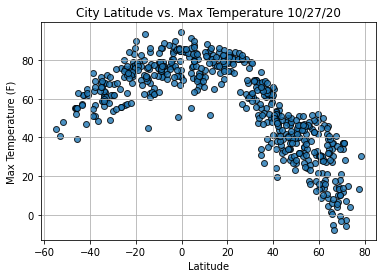

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

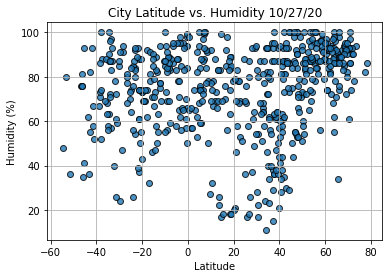

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

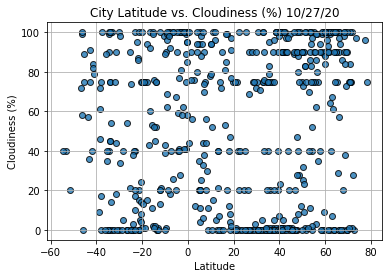

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()